In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error

%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

### 1. Dataset

In [22]:
dataset= pd.read_csv('iris.csv')

In [23]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
Y_setosa = dataset['class'].apply(lambda x: 1 if x == 'Iris-setosa' else 0).values.reshape(-1, 1) 
Y_versicolor = dataset['class'].apply(lambda x: 1 if x == 'Iris-versicolor' else 0).values.reshape(-1, 1) 
Y_virginica = dataset['class'].apply(lambda x: 1 if x == 'Iris-virginica' else 0).values.reshape(-1, 1)

print(Y_setosa)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [83]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
X = dataset[columns].values.reshape(-1, 4)  

print(X.shape)

(150, 4)


In [87]:
X_train_setosa, X_test_setosa, y_train_setosa, y_test_setosa = train_test_split(X, Y_setosa, test_size=0.2, random_state=42)
X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(X, Y_versicolor, test_size=0.2, random_state=42)

X_train_virginica, X_test_virginica, y_train_virginica, y_test_virginica = train_test_split(X, Y_virginica, test_size=0.2, random_state=42)

print(X_train_setosa.shape)
print(y_train_setosa.shape)

(120, 4)
(120, 1)


### 2. Modèle

In [74]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [75]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [76]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [77]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [78]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [79]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [80]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

### 6. Modèle final

In [81]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

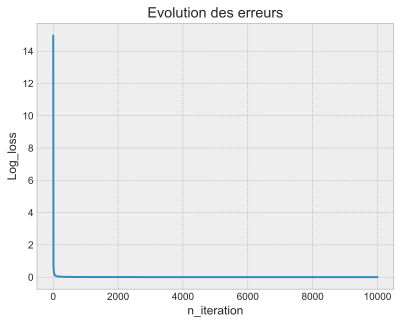

In [88]:
W,b=regression_logistique(X_train_setosa, y_train_setosa)

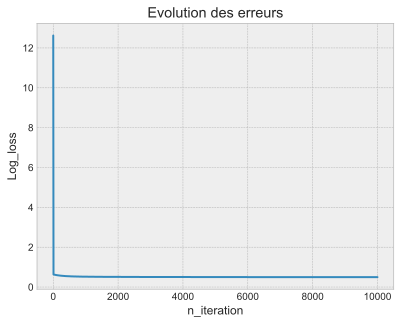

In [89]:
a,c=regression_logistique(X_train_versicolor, y_train_versicolor)

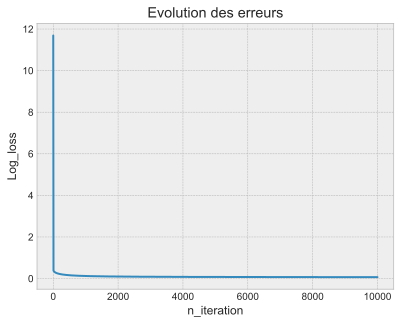

In [90]:
e,f=regression_logistique(X_train_virginica, y_train_virginica)

### 7. Evaluation du modèle et Visualisation

In [94]:
y_pred_setosa = predict(X_test_setosa, W, b)
print("Accuracy setosa =",np.round(accuracy_score(y_test_setosa, y_pred_setosa)*100),'%')

y_pred_versicolor = predict(X_test_versicolor, a, c)
print("Accuracy versicolor=",np.round(accuracy_score(y_test_versicolor, y_pred_versicolor)*100),'%')

y_pred_virginica = predict(X_test_virginica, e, f)
print("Accuracy virginica =",np.round(accuracy_score(y_test_virginica, y_pred_virginica)*100),'%')


Accuracy setosa = 100.0 %
Accuracy versicolor= 83.0 %
Accuracy virginica = 93.0 %


In [96]:
from sklearn.metrics import confusion_matrix
y_pred_setosa = predict(X_test_setosa, W, b)
cm = confusion_matrix(y_test_setosa, y_pred_setosa)

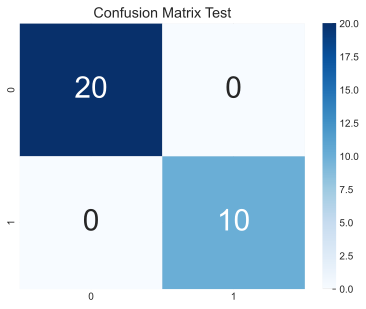

In [97]:
# Plot confusion matrix

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix Test')
plt.show()

In [100]:
y_pred_versicolor = predict(X_test_versicolor, a, c)
cm_versicolor = confusion_matrix(y_test_versicolor, y_pred_versicolor)

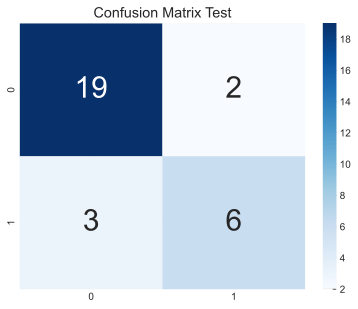

In [101]:
# Plot confusion matrix

ax = plt.axes()
df_cm_versicolor = cm_versicolor
sns.heatmap(df_cm_versicolor, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix Test')
plt.show()

In [102]:
y_pred_virginica = predict(X_test_virginica, e, f)
cm_virginica = confusion_matrix(y_test_virginica, y_pred_virginica)

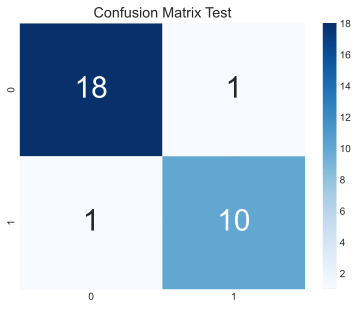

In [103]:
# Plot confusion matrix

ax = plt.axes()
df_cm_virginica = cm_virginica
sns.heatmap(df_cm_virginica, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix Test')
plt.show()